# Introduction

In [7]:
from ashlar import fileseries, thumbnail,reg
from ashlar.reg import plot_edge_shifts, plot_edge_quality
from ashlar.reg import BioformatsReader
from ashlar.reg import PyramidWriter
from ashlar.viewer import view_edges
# from ashlar.scripts.ashlar import process_axis_flip
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import numpy as np
import pandas as pd
# import pims
import napari
import os
from plotly import express as px
import plotly.io as pio
import kaleido
import skimage
import time
def get_datetime():
    return time.strftime("%Y%m%d_%H%M%S")

In [2]:
files = [
'/Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-06.ome.tiff',
'/Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-07.ome.tiff',
'/Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-08.ome.tiff'
] 

# Trying to understand ashlar OOP

In [ ]:
reader = BioformatsReader(files[0])

In [ ]:
aligner = reg.EdgeAligner(reader=reader, channel=0, max_shift=15, filter_sigma=1, verbose=True)

In [ ]:
aligner.run()

In [ ]:
#plotQC goes here

In [ ]:
channels = [0,1, 2,3, ]

In [ ]:
mosaic_args = {}
mosaic_args['channels'] = channels
mosaic_args['verbose'] = True

In [ ]:
aligner.mosaic_shape

In [ ]:
mosaic = reg.Mosaic(aligner=aligner,
                    shape=aligner.mosaic_shape, 
                    **mosaic_args)

In [ ]:
mosaic.dtype = np.uint16

In [ ]:
from ashlar.reg import PyramidWriter

In [ ]:
writer = PyramidWriter([mosaic], path="./image.ome.tif", scale=5, tile_size=1024, peak_size=1024, verbose=True)

In [ ]:
writer.run()

this did not work at all, all the edges are messed up

Test EdgeAligner and check with viewer

In [ ]:
%gui qt

In [ ]:
def export_aligned_images(viewer, trial):
    viewer.camera.zoom = 0.5
    all_layers_extent = viewer.layers.extent
    viewer_height = all_layers_extent[1][1][0]
    viewer_width = all_layers_extent[1][1][1]
    viewer.camera.center = (viewer_height/2, viewer_width/2)
    screen = viewer.screenshot()
    skimage.io.imsave(f'{get_datetime()}_{trial}_screencapture.png', screen)

In [ ]:
trial = 'exemplar_001_cycle_06_maxshift_30'

aligner_max30 = reg.EdgeAligner(reader=reader, channel=0, max_shift=30, filter_sigma=1, verbose=True)
aligner_max30.run()

viewer = napari.Viewer()
view_edges(aligner_max30, viewer=viewer, vmin=50, vmax=30000)

export_aligned_images(viewer, trial)

In [ ]:
reg.plot_edge_quality(aligner_max30, img=aligner_max30.reader.thumbnail)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
reg.plot_edge_scatter(aligner_max30)

this worked? ?

In [ ]:
trial = 'exemplar_001_cycle_06_maxshift_10'
aligner_max10 = reg.EdgeAligner(reader=reader, channel=0, max_shift=10, filter_sigma=1, verbose=True)
aligner_max10.run()
viewer = napari.Viewer()
view_edges(aligner_max10, viewer=viewer, vmin=50, vmax=30000)
export_aligned_images(viewer, trial)
reg.plot_edge_quality(aligner_max10, img=aligner_max10.reader.thumbnail)

In [ ]:
reg.plot_edge_scatter(aligner_max10)

In [ ]:
trial = 'exemplar_001_cycle_06_maxshift_20'
aligner_max20 = reg.EdgeAligner(reader=reader, channel=0, max_shift=20, filter_sigma=1, verbose=True)
aligner_max20.run()
viewer = napari.Viewer()
view_edges(aligner_max20, viewer=viewer, vmin=50, vmax=30000)
export_aligned_images(viewer, trial)
reg.plot_edge_quality(aligner_max20, img=aligner_max20.reader.thumbnail)

In [ ]:
reg.plot_edge_scatter(aligner_max20)

In [ ]:
trial = 'exemplar_001_cycle_06_maxshift_50'
aligner_max50 = reg.EdgeAligner(reader=reader, channel=0, max_shift=50, filter_sigma=1, verbose=True)
aligner_max50.run()
viewer = napari.Viewer()
view_edges(aligner_max50, viewer=viewer, vmin=50, vmax=30000)
export_aligned_images(viewer, trial)
reg.plot_edge_quality(aligner_max50, img=aligner_max50.reader.thumbnail)

In [ ]:
reg.plot_edge_scatter(aligner_max50)

In [ ]:
aligner_max50._cache

In [ ]:
ydata = np.clip(
        [np.linalg.norm(v[0]) for v in aligner_max50._cache.values()], 0.01, np.inf
    )

In [ ]:
ydata

In [ ]:
aligner_max30.all_errors

In [ ]:
aligner_max30._cache

In [ ]:
trial = 'exemplar_001_cycle_06_maxshift_15_sigma0'
aligner_15_0 = reg.EdgeAligner(reader=reader, channel=0, max_shift=15, filter_sigma=0, verbose=True)
aligner_15_0.run()
viewer = napari.Viewer()
view_edges(aligner_15_0, viewer=viewer, vmin=50, vmax=30000)
export_aligned_images(viewer, trial)
reg.plot_edge_quality(aligner_15_0, img=aligner_15_0.reader.thumbnail)

In [ ]:
reg.plot_layer_shifts(aligner_max30)

stitch first cycle

In [ ]:
reader = BioformatsReader(files[0])

In [ ]:
aligner = reg.EdgeAligner(reader=reader, channel=0, max_shift=30, filter_sigma=1, verbose=True)
aligner.run()

In [ ]:
trial = 'exemplar_001_cycle_06'
viewer = napari.Viewer()
view_edges(aligner, viewer=viewer, vmin=50, vmax=30000)
export_aligned_images(viewer, trial)
reg.plot_edge_quality(aligner, img=aligner.reader.thumbnail)

In [ ]:
mosaic_args = {}
mosaic_args['verbose'] = True
mosaic_args['channels'] = [0,1,2,3]

mosaic = reg.Mosaic(aligner, 
                    aligner.mosaic_shape, 
                    **mosaic_args
                    )

In [ ]:
mosaic.dtype = np.uint16

In [ ]:
writer = PyramidWriter([mosaic], "/Users/jnimoca/Jose_BI/ashlar/scratch/cycle06.ome.tif", scale=5, tile_size=1024, peak_size=1024, verbose=True)
writer.run()

In [ ]:
mosaic.channels

In [ ]:
mosaic.shape[0]

In [ ]:
#create a 3-dimensional array of zeros, with shape mosaic.channels, mosaic.shape[0], mosaic.shape[1]
mosaic_array = np.zeros((len(mosaic.channels), mosaic.shape[0], mosaic.shape[1]), dtype=np.uint16)
for i, channel in enumerate(mosaic.channels):
    mosaic_array[i, :, :] = mosaic.assemble_channel[channel]

In [ ]:
mosaics = np.array([mosaic.channels, mosaic.shape[0], mosaic.shape[1]], dtype=np.uint16)

# Following process single

In [ ]:
filepaths = files

In [ ]:
mosaics = []

In [ ]:
quiet = False
if not quiet:
        print("Stitching and registering input images")
        print('Cycle 0:')
        print('    reading %s' % filepaths[0])

In [ ]:
reader = BioformatsReader(filepaths[0])

In [ ]:
edge_aligner = reg.EdgeAligner(reader, channel=0, max_shift=30, filter_sigma=1, verbose=True)
edge_aligner.run()

In [ ]:
mosaics.append(reg.Mosaic(edge_aligner, edge_aligner.mosaic_shape ))

In [ ]:
for file in filepaths[1:]:
    if not quiet:
        print('    reading %s' % file)
    reader = BioformatsReader(file)
    layer_aligner = reg.LayerAligner(reader, edge_aligner)
    layer_aligner.run()
    mosaics.append(reg.Mosaic(layer_aligner, edge_aligner.mosaic_shape ))

In [ ]:
mosaics

In [ ]:
writer = reg.PyramidWriter(
        mosaics, "ome.tif", verbose=not quiet,
    )
writer.run()

In [ ]:
def ashlar (files:list, 
        channel_to_align:int, 
        max_shift:int, 
        filter_sigma:int, 
        quiet: bool=False,
        verbose:bool=True,
        output_folder:str=None,
        output_name:str=None,):
    
    reader = BioformatsReader(files[0])
    
    if not quiet:
        print("Stitching and registering input images")
        print('Cycle 0:')
        print('    reading %s' % files[0])
    
    aligner = reg.EdgeAligner(reader=reader, channel=channel_to_align, max_shift=max_shift, filter_sigma=filter_sigma, verbose=verbose)
    aligner.run()

    mosaic_args = {}
    mosaic_args['verbose'] = verbose
    mosaic_args['channels'] = list(range(0, reader.metadata.num_channels))

    mosaics = []
    mosaics.append(reg.Mosaic(aligner, aligner.mosaic_shape, **mosaic_args))

    for file in files[1:]:
        if not quiet:
            print('    reading %s' % file)
        reader = BioformatsReader(file)
        layer_aligner = reg.LayerAligner(reader, aligner)
        layer_aligner.run()
        mosaics.append(reg.Mosaic(layer_aligner, aligner.mosaic_shape))

    writer = PyramidWriter(mosaics, f"{output_folder}{get_datetime()}_{output_name}", verbose=verbose)
    writer.run()

In [ ]:
ashlar(files=files, channel_to_align=0, max_shift=30, filter_sigma=1, quiet=False, verbose=True, output_folder='/Users/jnimoca/Jose_BI/ashlar/scratch/', output_name='cycles.ome.tif')

## Plotting QC with ashlar

In [157]:
aligner

In [158]:
edge_aligner.run()

    assembling thumbnail 6/6
    using explicit error threshold
    aligning edge 7/7


In [ ]:
edge_aligner.all_errors

In [ ]:
from ashlar.reg import plot_layer_quality
plot_layer_quality(edge_aligner)

In [ ]:
from ashlar.reg import plot_layer_shifts
plot_layer_shifts(edge_aligner)

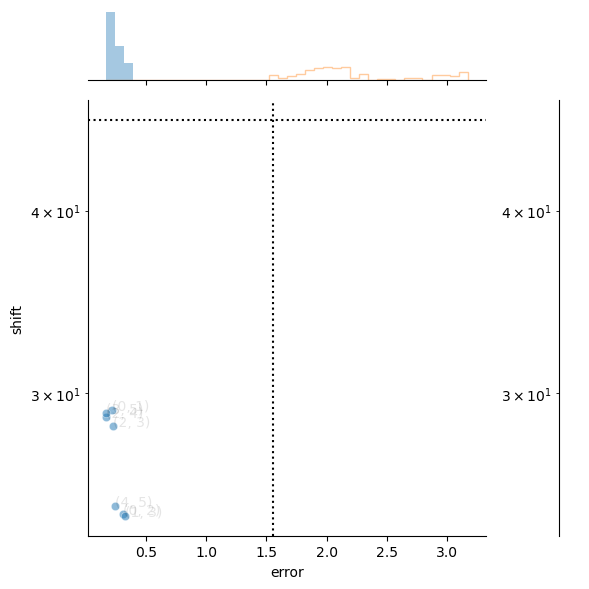

In [184]:
from ashlar.reg import plot_edge_scatter
plot_edge_scatter(edge_aligner)

In [ ]:
from ashlar.reg import plot_edge_quality
plot_edge_quality(edge_aligner, img=edge_aligner.reader.thumbnail)
#brighter is less error

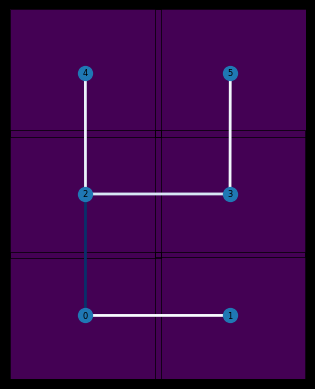

In [160]:
from ashlar.reg import plot_edge_shifts
plot_edge_shifts(edge_aligner)
#brighter is more distance

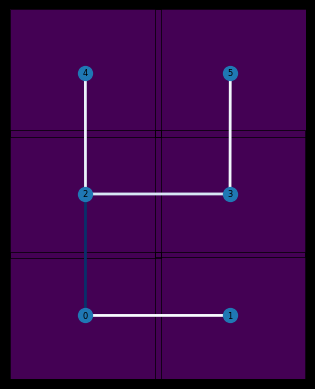

In [161]:
fig = plot_edge_shifts(edge_aligner)
#brighter is more distance

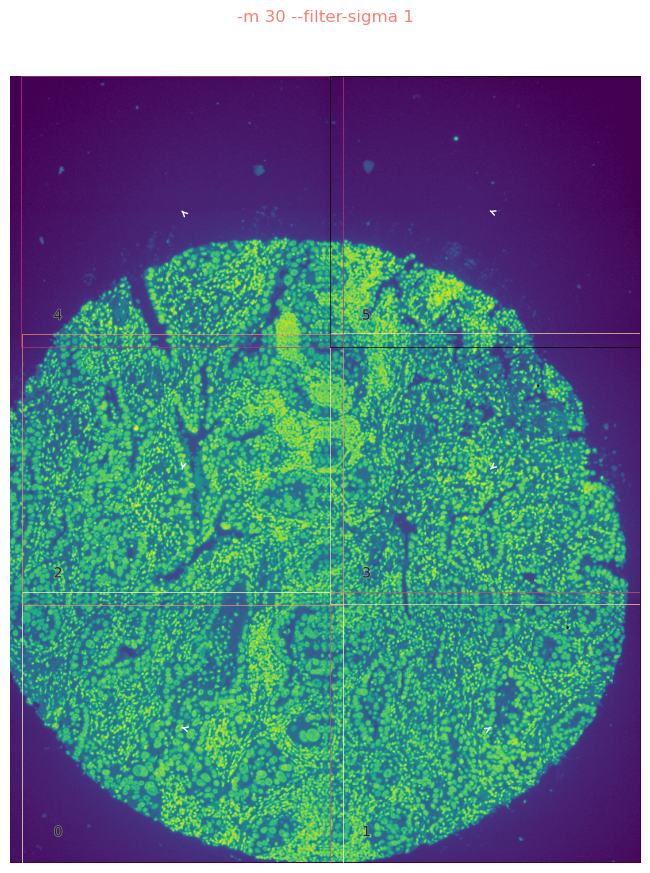

In [173]:
c1r = BioformatsReader(files[0])
c2r = BioformatsReader(files[1])

c1e = reg.EdgeAligner(c1r, channel=0, max_shift=30, filter_sigma=1, verbose=True)
c1e.run()

c21l = reg.LayerAligner(c2r, c1e, max_shift=30, filter_sigma=0, verbose=True)
c21l.run()

c21l.mosaic_shape = c1e.mosaic_shape

vmin = np.percentile(c1e.reader.thumbnail[c1e.reader.thumbnail > 0], 1)
reg.plot_edge_quality(c1e, img=np.log1p(c1e.reader.thumbnail), im_kwargs=dict(vmin=np.log1p(vmin)))

plt.gcf().suptitle(f"-m {c1e.max_shift} --filter-sigma {c1e.filter_sigma}", color='salmon')
# save plot to disk
plt.gcf().tight_layout()
plt.gcf().set_size_inches(16, 9)
plt.gcf().savefig(f'edge_quality-m{c1e.max_shift}_s{c1e.filter_sigma}.jpg', bbox_inches='tight', dpi=144)

reg.plot_layer_quality(c21l, img=np.log1p(c1e.reader.thumbnail), im_kwargs=dict(vmin=np.log1p(vmin)))
plt.gcf().suptitle(f"-m {c1e.max_shift} --filter-sigma {c1e.filter_sigma}", color='salmon')
# save plot to disk
plt.gcf().tight_layout()
plt.gcf().set_size_inches(16, 9)
plt.gcf().savefig(f'layer_quality-m{c1e.max_shift}_s{c1e.filter_sigma}.jpg', bbox_inches='tight', dpi=144)

In [ ]:
# using napari
from ashlar import viewer
v = viewer.view_edges(c1e, tiles=range(0, 6))
viewer.view_edges(c21l, tiles=range(0, 6), viewer=v)

# Creating df for QC, and plotting errors and shifts

In [3]:
files = [
'/Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-06.ome.tiff',
'/Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-07.ome.tiff',
'/Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-08.ome.tiff'
]

In [40]:
def ashlar (files:list, 
        channel_to_align:int, 
        max_shift:int, 
        filter_sigma:int, 
        quiet: bool=False,
        verbose:bool=True,
        output_image_path:str=None
        ):
    
    reader = BioformatsReader(files[0])
    
    if not quiet:
        print("Stitching and registering input images")
        print('Cycle 0:')
        print('    reading %s' % files[0])
    
    aligner = reg.EdgeAligner(reader=reader, channel=channel_to_align, max_shift=max_shift, filter_sigma=filter_sigma, verbose=verbose)
    aligner.run()

    df = pd.DataFrame(
        data = {
            "edge_id": [f"edge_{str(i).zfill(4)}" for i in range(0, aligner.all_errors.shape[0])],
            "cycle_id": "cycle_01",
            'X_Error': np.clip(aligner.all_errors, 0, 10),
            'Y_Shift': np.clip([np.linalg.norm(v[0]) for v in aligner._cache.values()], 0.01, np.inf)
        }
    )

    mosaic_args = {}
    mosaic_args['verbose'] = verbose
    mosaic_args['channels'] = list(range(0, reader.metadata.num_channels))

    mosaics = []
    mosaics.append(reg.Mosaic(aligner, aligner.mosaic_shape, **mosaic_args))

    layers = []

    for i, file in enumerate(files[1:]):
        if not quiet:
            print('    reading %s' % file)
        
        tmp_reader = BioformatsReader(file)
        tmp_aligner = reg.EdgeAligner(reader=tmp_reader, channel=channel_to_align, max_shift=max_shift, filter_sigma=filter_sigma, verbose=verbose)
        tmp_aligner.run()
        tmp_df = pd.DataFrame(
            data = {
                "edge_id": [f"edge_{str(i).zfill(4)}" for i in range(0, tmp_aligner.all_errors.shape[0])],
                "cycle_id": f"cycle_{str(i+2).zfill(2)}",
                'X_Error': np.clip(tmp_aligner.all_errors, 0, 10),
                'Y_Shift': np.clip([np.linalg.norm(v[0]) for v in tmp_aligner._cache.values()], 0.01, np.inf)
            }
        )

        df = pd.concat([df, tmp_df], ignore_index=True)
        
        layer_aligner = reg.LayerAligner(tmp_reader, aligner)
        layer_aligner.run()
        layers.append(layer_aligner)
        mosaics.append(reg.Mosaic(layer_aligner, aligner.mosaic_shape))

    print(f"Writing output image to {output_image_path}")
    writer = PyramidWriter(mosaics, output_image_path, verbose=verbose)
    writer.run()

    return df,aligner,layers

In [24]:
df,aligner,layers = ashlar(files=files, channel_to_align=0, max_shift=35, filter_sigma=1, quiet=False, verbose=True, output_folder='/Users/jnimoca/Jose_BI/ashlar/scratch/', output_name='cycles3.ome.tif')

Stitching and registering input images
Cycle 0:
    reading /Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-06.ome.tiff
    assembling thumbnail 6/6
    quantifying alignment error 20/90

/opt/homebrew/Caskroom/mambaforge/base/envs/ashlar/lib/python3.10/site-packages/ashlar/reg.py:1367: DataWarning:

Stage coordinates' measurement unit is undefined; assuming μm.



    quantifying alignment error 90/90
    aligning edge 7/7
    reading /Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-07.ome.tiff
    assembling thumbnail 6/6
    quantifying alignment error 20/90

/opt/homebrew/Caskroom/mambaforge/base/envs/ashlar/lib/python3.10/site-packages/ashlar/reg.py:1367: DataWarning:

Stage coordinates' measurement unit is undefined; assuming μm.



    quantifying alignment error 90/90
    aligning edge 7/7
    assembling thumbnail 6/6
    estimated cycle offset [y x] = [ 1.0646154 45.77846  ]
    reading /Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-08.ome.tiff
    assembling thumbnail 6/6
    quantifying alignment error 30/90

/opt/homebrew/Caskroom/mambaforge/base/envs/ashlar/lib/python3.10/site-packages/ashlar/reg.py:1367: DataWarning:

Stage coordinates' measurement unit is undefined; assuming μm.



    quantifying alignment error 90/90
    aligning edge 7/7
    assembling thumbnail 6/6
    estimated cycle offset [y x] = [ 0.       38.326153]
Writing output image to /Users/jnimoca/Jose_BI/ashlar/scratch/20240405_143102_cycles3.ome.tif
Cycle 0:
    Channel 0:
        merging tile 6/6
    Channel 1:
        merging tile 6/6
    Channel 2:
        merging tile 6/6
    Channel 3:
        merging tile 6/6
Cycle 1:
    Channel 0:
    Channel 1:
    Channel 2:
    Channel 3:
Cycle 2:
    Channel 0:
    Channel 1:
    Channel 2:
    Channel 3:
Generating pyramid
    Level 1 (1256 x 1569)
        processing channel 12/12
    Level 2 (628 x 785)
        processing channel 12/12


In [25]:
def plot_scatter_shift_error(df:pd.DataFrame):

    fig = px.scatter(
        df, x='X_Error', y='Y_Shift', 
        color='cycle_id', 
        hover_data=['edge_id'], 
        text='edge_id', )

    fig.update_layout(
        title='Error vs Shift', 
        height=800,
        width=1200,
        paper_bgcolor="white",
        plot_bgcolor="white",
        uniformtext_minsize=12, 
        uniformtext_mode='hide'
    )
    fig.update_yaxes(
        showgrid=False,

        gridcolor='LightGrey',
        showline=True,
        linecolor="black",
        mirror=True,

        nticks=7,
        title=dict(
            text='Shift distance (pixels)',
            font=dict(
                family='Arial',
                size=18,
                color='black'
                )   
        )
    )
    fig.update_xaxes(
        showgrid=False,

        gridcolor='LightGrey',
        showline=True,
        linecolor="black",
        mirror=True,

        title=dict(
            text='Error (NCC)', 
            font=dict(
                family='Arial',
                size=18,
                color='black'
                )   
        )
    )

    fig.update_traces(
        textposition='top center',
        textfont_size=10,
        texttemplate='',
        marker=dict(
            size=14, 
            opacity=0.9, 
            line=dict(
                width=1, 
                color='DarkSlateGrey'
            )
        )
    )

    fig.update_annotations(
        font=dict(
            family="Arial",
            size=10,
            color="black"
        )
    )

    return fig

[x] Find the units of the y and x axis 

### plot  Adjancency graph with edges colored by E NCC overlaid by Nuclear stain

In [29]:
def main(files, channel_to_align, max_shift, filter_sigma, output_folder, output_image_name, QC_folder):

    df, aligner, layers =  ashlar (files=files, 
        channel_to_align=channel_to_align, 
        max_shift=max_shift, 
        filter_sigma=filter_sigma, 
        quiet=False,
        verbose=True,
        output_folder=output_folder,
        output_name=output_image_name,
        QC_folder= QC_folder)


    datetime = get_datetime()
    export_path= os.path.join(QC_folder, f"{datetime}_ashlar_QC_plots.pdf")

    fig = plot_scatter_shift_error(df)
    plt.suptitle(f"Error vs Shift \n -m {aligner.max_shift} --filter-sigma {aligner.filter_sigma}", color='salmon')
    pio.write_image(fig, os.path.join(QC_folder, f"{datetime}_Error_vs_Shift_ScatterPlot.pdf"), scale=6, width=600, height=500)

    filename = export_path
    pdf_pages = PdfPages(filename)

    plot_edge_shifts(aligner)
    #brighter is more distance
    plt.suptitle(f"Edge Shifts : Brighter is more shift \n -m {aligner.max_shift} --filter-sigma {aligner.filter_sigma}", color='salmon')
    plt.tight_layout()
    plt.gcf().set_size_inches(16, 9)
    fig = plt.gcf()
    pdf_pages.savefig(fig)
    plt.close(fig)

    plot_edge_quality(aligner, img=aligner.reader.thumbnail)
    plt.suptitle(f"Edge Quality : Brighter is better \n -m {aligner.max_shift} --filter-sigma {aligner.filter_sigma}", color='salmon')
    plt.tight_layout()
    plt.gcf().set_size_inches(16, 9)
    fig = plt.gcf()
    pdf_pages.savefig(fig)
    plt.close(fig)


    for i, layer in enumerate(layers):
        layer.mosaic_shape = aligner.mosaic_shape
        reg.plot_layer_quality(layer, img=aligner.reader.thumbnail)
        plt.gcf().suptitle(f"Cycle {i+1} -m {aligner.max_shift} --filter-sigma {aligner.filter_sigma}", color='salmon')
        plt.gcf().tight_layout()
        plt.gcf().set_size_inches(16, 9)
        fig = plt.gcf()
        pdf_pages.savefig(fig)
        plt.close(fig)

    # Close the PdfPages object
    pdf_pages.close()

In [31]:
main(files=files, channel_to_align=0, max_shift=30, filter_sigma=1, output_folder='/Users/jnimoca/Jose_BI/ashlar/scratch/', output_image_name='cycles.ome.tif', QC_folder='/Users/jnimoca/Jose_BI/ashlar/scratch/')

Stitching and registering input images
Cycle 0:
    reading /Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-06.ome.tiff
    assembling thumbnail 6/6
    quantifying alignment error 20/90

/opt/homebrew/Caskroom/mambaforge/base/envs/ashlar/lib/python3.10/site-packages/ashlar/reg.py:1367: DataWarning:

Stage coordinates' measurement unit is undefined; assuming μm.



    quantifying alignment error 90/90
    aligning edge 7/7
    reading /Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-07.ome.tiff
    assembling thumbnail 6/6
    quantifying alignment error 20/90

/opt/homebrew/Caskroom/mambaforge/base/envs/ashlar/lib/python3.10/site-packages/ashlar/reg.py:1367: DataWarning:

Stage coordinates' measurement unit is undefined; assuming μm.



    quantifying alignment error 90/90
    aligning edge 7/7
    assembling thumbnail 6/6
    estimated cycle offset [y x] = [ 1.0646154 45.77846  ]
    reading /Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-08.ome.tiff
    assembling thumbnail 6/6
    quantifying alignment error 30/90

/opt/homebrew/Caskroom/mambaforge/base/envs/ashlar/lib/python3.10/site-packages/ashlar/reg.py:1367: DataWarning:

Stage coordinates' measurement unit is undefined; assuming μm.



    quantifying alignment error 90/90
    aligning edge 7/7
    assembling thumbnail 6/6
    estimated cycle offset [y x] = [ 0.       38.326153]
Writing output image to /Users/jnimoca/Jose_BI/ashlar/scratch/20240405_143536_cycles.ome.tif
Cycle 0:
    Channel 0:
        merging tile 6/6
    Channel 1:
        merging tile 6/6
    Channel 2:
        merging tile 6/6
    Channel 3:
        merging tile 6/6
Cycle 1:
    Channel 0:
    Channel 1:
    Channel 2:
    Channel 3:
Cycle 2:
    Channel 0:
    Channel 1:
    Channel 2:
    Channel 3:
Generating pyramid
    Level 1 (1256 x 1569)
        processing channel 12/12
    Level 2 (628 x 785)
        processing channel 12/12


<Figure size 640x480 with 0 Axes>

In [16]:
datetime = get_datetime()

fig = plot_scatter_shift_error(df)
plt.suptitle(f"Error vs Shift \n -m {aligner.max_shift} --filter-sigma {aligner.filter_sigma}", color='salmon')
pio.write_image(fig, f"{datetime}_Error_vs_Shift_ScatterPlot.pdf", scale=6, width=600, height=500)

filename = f'{datetime}_ashlar_QC_plots.pdf'
pdf_pages = PdfPages(filename)

plot_edge_shifts(aligner)
#brighter is more distance
plt.suptitle(f"Edge Shifts : Brighter is more shift \n -m {aligner.max_shift} --filter-sigma {aligner.filter_sigma}", color='salmon')
plt.tight_layout()
plt.gcf().set_size_inches(16, 9)
fig = plt.gcf()
pdf_pages.savefig(fig)
plt.close(fig)

plot_edge_quality(aligner, img=aligner.reader.thumbnail)
plt.suptitle(f"Edge Quality : Brighter is better \n -m {aligner.max_shift} --filter-sigma {aligner.filter_sigma}", color='salmon')
plt.tight_layout()
plt.gcf().set_size_inches(16, 9)
fig = plt.gcf()
pdf_pages.savefig(fig)
plt.close(fig)


for i, layer in enumerate(layers):
    layer.mosaic_shape = aligner.mosaic_shape
    reg.plot_layer_quality(layer, img=aligner.reader.thumbnail)
    plt.gcf().suptitle(f"Cycle {i+1} -m {aligner.max_shift} --filter-sigma {aligner.filter_sigma}", color='salmon')
    plt.gcf().tight_layout()
    plt.gcf().set_size_inches(16, 9)
    fig = plt.gcf()
    pdf_pages.savefig(fig)
    plt.close(fig)

# Close the PdfPages object
pdf_pages.close()

<Figure size 640x480 with 0 Axes>

# Accumulating error per cycle, and plotting per color in scatter plot

In [41]:
def main(files, channel_to_align, max_shift, filter_sigma, output_image_path, QC_folder):
    
    datetime = get_datetime()

    df, aligner, layers =  ashlar (files=files, 
        channel_to_align=channel_to_align, 
        max_shift=max_shift, 
        filter_sigma=filter_sigma, 
        quiet=False,
        verbose=True,
        output_image_path= output_image_path
        )
    
    export_path= os.path.join(QC_folder, f"{datetime}_ashlar_QC_plots.pdf")

    fig = plot_scatter_shift_error(df)
    plt.suptitle(f"Error vs Shift \n -m {aligner.max_shift} --filter-sigma {aligner.filter_sigma}", color='salmon')
    pio.write_image(fig, os.path.join(QC_folder, f"{datetime}_Error_vs_Shift_ScatterPlot.pdf"), scale=6, width=600, height=500)

    filename = export_path
    pdf_pages = PdfPages(filename)

    plot_edge_shifts(aligner)
    #brighter is more distance
    plt.suptitle(f"Edge Shifts : Brighter is more shift \n -m {aligner.max_shift} --filter-sigma {aligner.filter_sigma}", color='salmon')
    plt.tight_layout()
    plt.gcf().set_size_inches(16, 9)
    fig = plt.gcf()
    pdf_pages.savefig(fig)
    plt.close(fig)

    plot_edge_quality(aligner, img=aligner.reader.thumbnail)
    plt.suptitle(f"Edge Quality : Brighter is better \n -m {aligner.max_shift} --filter-sigma {aligner.filter_sigma}", color='salmon')
    plt.tight_layout()
    plt.gcf().set_size_inches(16, 9)
    fig = plt.gcf()
    pdf_pages.savefig(fig)
    plt.close(fig)


    for i, layer in enumerate(layers):
        layer.mosaic_shape = aligner.mosaic_shape
        reg.plot_layer_quality(layer, img=aligner.reader.thumbnail)
        plt.gcf().suptitle(f"Cycle {i+1} -m {aligner.max_shift} --filter-sigma {aligner.filter_sigma}", color='salmon')
        plt.gcf().tight_layout()
        plt.gcf().set_size_inches(16, 9)
        fig = plt.gcf()
        pdf_pages.savefig(fig)
        plt.close(fig)

    # Close the PdfPages object
    pdf_pages.close()

In [42]:
main(files=files, 
    channel_to_align=0, 
    max_shift=30, 
    filter_sigma=1, 
    output_image_path='/Users/jnimoca/Jose_BI/ashlar/scratch/output/cycles.ome.tif', 
    QC_folder='/Users/jnimoca/Jose_BI/ashlar/scratch/output/')

Stitching and registering input images
Cycle 0:
    reading /Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-06.ome.tiff
    assembling thumbnail 6/6
    quantifying alignment error 20/90

/opt/homebrew/Caskroom/mambaforge/base/envs/ashlar/lib/python3.10/site-packages/ashlar/reg.py:1367: DataWarning:

Stage coordinates' measurement unit is undefined; assuming μm.



    quantifying alignment error 90/90
    aligning edge 7/7
    reading /Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-07.ome.tiff
    assembling thumbnail 6/6
    quantifying alignment error 20/90

/opt/homebrew/Caskroom/mambaforge/base/envs/ashlar/lib/python3.10/site-packages/ashlar/reg.py:1367: DataWarning:

Stage coordinates' measurement unit is undefined; assuming μm.



    quantifying alignment error 90/90
    aligning edge 7/7
    assembling thumbnail 6/6
    estimated cycle offset [y x] = [ 1.0646154 45.77846  ]
    reading /Users/jnimoca/Jose_BI/data/exemplar-001/raw/exemplar-001-cycle-08.ome.tiff
    assembling thumbnail 6/6
    quantifying alignment error 20/90

/opt/homebrew/Caskroom/mambaforge/base/envs/ashlar/lib/python3.10/site-packages/ashlar/reg.py:1367: DataWarning:

Stage coordinates' measurement unit is undefined; assuming μm.



    quantifying alignment error 90/90
    aligning edge 7/7
    assembling thumbnail 6/6
    estimated cycle offset [y x] = [ 0.       38.326153]
Writing output image to /Users/jnimoca/Jose_BI/ashlar/scratch/output/cycles.ome.tif
Cycle 0:
    Channel 0:
        merging tile 6/6
    Channel 1:
        merging tile 6/6
    Channel 2:
        merging tile 6/6
    Channel 3:
        merging tile 6/6
Cycle 1:
    Channel 0:
    Channel 1:
    Channel 2:
    Channel 3:
Cycle 2:
    Channel 0:
    Channel 1:
    Channel 2:
    Channel 3:
Generating pyramid
    Level 1 (1256 x 1569)
        processing channel 12/12
    Level 2 (628 x 785)
        processing channel 12/12


<Figure size 640x480 with 0 Axes>